# Linear Regression Example

Implementation of a linear regression with Tensorflow v2 library

This example is using a low-level approach to better understand all mechanisms behind the training process





In [35]:
! pip install tensorflow numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import numpy as np
import tensorflow as tf

rng = np.random

In [ ]:
# def set_seed(seed: int):
#   np.random.seed(seed)
#   tf.random.set_seed(seed)

# seed: int = 1042
# set_seed(seed)

In [37]:
# Parameters

learning_rate: float = 0.01
training_steps: int = 1000
display_step: int = 50

In [38]:
# Training Data

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [39]:
# Weight and Bias, initialized randomly

W = tf.Variable(rng.rand(), name="weight")
b = tf.Variable(rng.rand(), name="bias")

# Linear regression (Wx + b)
def linear_regression(x: float) -> float:
  return W * x + b

# Mean squared error
def mean_square(y_pred: float, y_true: float) -> float:
  return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer
optimizers = tf.keras.optimizers.SGD(learning_rate)

In [40]:
# Optimization process.
def run_optimization() -> None:
  # Wrap computation inside a GradientTape for automatic differentiation.
  with tf.GradientTape() as g:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
  
  # Compute gradients.
  gradients = g.gradient(loss, [W, b])

  # Update W and b following gradients
  optimizers.apply_gradients(zip(gradients, [W, b]))

In [41]:
# Run training for the given number of steps
for step in range(1, training_steps+1):
  # Run the optimization to update W and b values
  run_optimization()

  if step % display_step == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)

    print(f"step: {step}, loss: {loss}, W: {W.numpy()}, b: {b.numpy()}")

step: 50, loss: 0.15413321554660797, W: 0.24498049914836884, b: 0.8459782004356384
step: 100, loss: 0.15407375991344452, W: 0.24574199318885803, b: 0.8405795693397522
step: 150, loss: 0.15402711927890778, W: 0.2464163601398468, b: 0.8357985019683838
step: 200, loss: 0.15399058163166046, W: 0.24701355397701263, b: 0.831564724445343
step: 250, loss: 0.1539618819952011, W: 0.24754244089126587, b: 0.8278151154518127
step: 300, loss: 0.1539393812417984, W: 0.2480107694864273, b: 0.8244948983192444
step: 350, loss: 0.15392176806926727, W: 0.24842549860477448, b: 0.8215547204017639
step: 400, loss: 0.15390793979167938, W: 0.24879278242588043, b: 0.8189508318901062
step: 450, loss: 0.15389709174633026, W: 0.24911803007125854, b: 0.8166449069976807
step: 500, loss: 0.15388858318328857, W: 0.24940605461597443, b: 0.8146030306816101
step: 550, loss: 0.15388192236423492, W: 0.2496611475944519, b: 0.81279456615448
step: 600, loss: 0.1538766771554947, W: 0.24988701939582825, b: 0.8111931681632996
st

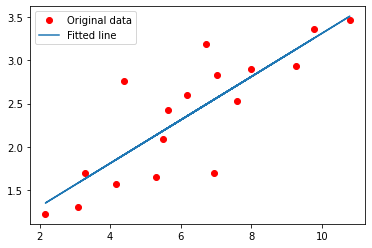

In [42]:
import matplotlib.pyplot as plt

# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()